In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('../data_processing/')
sys.path.append('../folds/')
from feature import Feature
from folds import CustomFold
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from yellowbrick.features import RFECV
from scipy.signal import savgol_filter

In [2]:
df = pd.read_hdf('../../data/e3.h5', key='table')

In [3]:
df_short = df.iloc[:df.shape[0] // 10]

In [4]:
x = df_short.drop(['ttf'], axis=1).values
y = df_short['ttf'].values

In [5]:
xgb_params = {
    "name": "XGBRegressor",
    "eta": 0.001,
    "max_depth": 5,
    "n_estimators": 100,
    "subsample": 0.7,
    "objective": "reg:linear",
    "eval_metric": "mae",
    "verbosity": 3,
    "nthread": 15,
  }

In [6]:
model = XGBRegressor(**xgb_params)

## Quick example with sklearn RFE (to check that everything works)

In [ ]:
selector = RFE(model, 20, step=10, verbose=1)
selector = selector.fit(x, y)

print(selector.support_) 
print(selector.ranking_)

## Yellowbrick RFE

  0%|          | 0/180 [00:00<?, ?it/s]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  1%|          | 1/180 [09:46<29:09:09, 586.31s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


  1%|          | 2/180 [19:39<29:05:07, 588.24s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  2%|▏         | 3/180 [29:29<28:57:08, 588.86s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  2%|▏         | 4/180 [39:25<28:53:29, 590.96s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  3%|▎         | 5/180 [49:23<28:49:51, 593.10s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


  3%|▎         | 6/180 [59:26<28:48:28, 596.02s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.39428289797930016%
Percentage of data thrown out: 0.35930618928758806%


  4%|▍         | 7/180 [1:09:19<28:36:19, 595.26s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


  4%|▍         | 8/180 [1:19:14<28:26:21, 595.24s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


  5%|▌         | 9/180 [1:29:11<28:17:50, 595.74s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


  6%|▌         | 10/180 [1:38:57<27:59:37, 592.81s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  6%|▌         | 11/180 [1:48:38<27:39:28, 589.16s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  7%|▋         | 12/180 [1:58:28<27:30:20, 589.41s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  7%|▋         | 13/180 [2:08:14<27:17:26, 588.30s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


  8%|▊         | 14/180 [2:17:56<27:02:49, 586.56s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  8%|▊         | 15/180 [2:27:38<26:48:57, 585.08s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


  9%|▉         | 16/180 [2:37:24<26:39:56, 585.34s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


  9%|▉         | 17/180 [2:47:11<26:31:54, 585.98s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 10%|█         | 18/180 [2:56:57<26:21:40, 585.81s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 11%|█         | 19/180 [3:06:42<26:11:22, 585.61s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 11%|█         | 20/180 [3:16:29<26:03:07, 586.17s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 12%|█▏        | 21/180 [3:26:20<25:56:51, 587.49s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 12%|█▏        | 22/180 [3:36:05<25:45:35, 586.93s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 13%|█▎        | 23/180 [3:46:02<25:43:25, 589.84s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 13%|█▎        | 24/180 [3:55:47<25:29:42, 588.35s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 14%|█▍        | 25/180 [4:05:25<25:11:54, 585.25s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 14%|█▍        | 26/180 [4:15:10<25:02:03, 585.22s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 15%|█▌        | 27/180 [4:24:48<24:46:46, 583.05s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 16%|█▌        | 28/180 [4:34:29<24:35:43, 582.52s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 16%|█▌        | 29/180 [4:44:11<24:25:35, 582.35s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 17%|█▋        | 30/180 [4:53:39<24:04:46, 577.91s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 17%|█▋        | 31/180 [5:03:06<23:46:52, 574.58s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 18%|█▊        | 32/180 [5:12:38<23:35:51, 574.00s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 18%|█▊        | 33/180 [5:22:10<23:24:40, 573.34s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 19%|█▉        | 34/180 [5:31:39<23:11:40, 571.92s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 19%|█▉        | 35/180 [5:41:11<23:02:33, 572.10s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 20%|██        | 36/180 [5:50:37<22:48:50, 570.35s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 21%|██        | 37/180 [6:00:03<22:36:05, 568.99s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 21%|██        | 38/180 [6:09:38<22:30:58, 570.83s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 22%|██▏       | 39/180 [6:19:11<22:22:41, 571.36s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 22%|██▏       | 40/180 [6:28:26<22:01:48, 566.49s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 23%|██▎       | 41/180 [6:37:39<21:43:04, 562.48s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 23%|██▎       | 42/180 [6:46:52<21:26:54, 559.52s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.35930618928758806%
Percentage of data thrown out: 0.47695511852334693%


 24%|██▍       | 43/180 [6:56:06<21:13:50, 557.89s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 24%|██▍       | 44/180 [7:05:23<21:04:14, 557.75s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 25%|██▌       | 45/180 [7:14:39<20:53:42, 557.20s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 26%|██▌       | 46/180 [7:23:58<20:45:13, 557.56s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 26%|██▌       | 47/180 [7:33:16<20:36:37, 557.88s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 27%|██▋       | 48/180 [7:42:38<20:29:53, 559.04s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 27%|██▋       | 49/180 [7:51:54<20:18:35, 558.13s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 28%|██▊       | 50/180 [8:00:52<19:56:18, 552.14s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 28%|██▊       | 51/180 [8:09:55<19:40:56, 549.27s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 29%|██▉       | 52/180 [8:19:00<19:28:59, 547.96s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 29%|██▉       | 53/180 [8:28:11<19:22:05, 549.02s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 30%|███       | 54/180 [8:37:13<19:08:14, 546.78s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 31%|███       | 55/180 [8:46:16<18:56:45, 545.65s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 31%|███       | 56/180 [8:55:18<18:45:17, 544.49s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 32%|███▏      | 57/180 [9:04:28<18:40:05, 546.39s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 32%|███▏      | 58/180 [9:13:35<18:30:59, 546.39s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 33%|███▎      | 59/180 [9:22:37<18:19:26, 545.17s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 33%|███▎      | 60/180 [9:31:23<17:58:34, 539.29s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 34%|███▍      | 61/180 [9:40:07<17:40:48, 534.86s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 34%|███▍      | 62/180 [9:48:53<17:26:22, 532.06s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 35%|███▌      | 63/180 [9:57:40<17:14:29, 530.51s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 36%|███▌      | 64/180 [10:06:27<17:03:52, 529.59s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 36%|███▌      | 65/180 [10:15:15<16:53:55, 529.00s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.3211497798057203%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 37%|███▋      | 66/180 [10:24:03<16:44:28, 528.67s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 37%|███▋      | 67/180 [10:32:47<16:33:17, 527.41s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 38%|███▊      | 68/180 [10:41:37<16:25:46, 528.09s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 38%|███▊      | 69/180 [10:50:22<16:15:12, 527.14s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 39%|███▉      | 70/180 [10:58:50<15:56:12, 521.57s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 39%|███▉      | 71/180 [11:07:13<15:37:01, 515.80s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 40%|████      | 72/180 [11:15:46<15:27:06, 515.06s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 41%|████      | 73/180 [11:24:18<15:16:42, 514.05s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 41%|████      | 74/180 [11:32:42<15:03:10, 511.23s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 42%|████▏     | 75/180 [11:41:07<14:51:04, 509.18s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 42%|████▏     | 76/180 [11:49:30<14:39:47, 507.58s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 43%|████▎     | 77/180 [11:57:54<14:29:31, 506.52s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 43%|████▎     | 78/180 [12:06:30<14:25:25, 509.08s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 44%|████▍     | 79/180 [12:15:02<14:18:26, 509.97s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 44%|████▍     | 80/180 [12:22:59<13:53:40, 500.21s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 45%|████▌     | 81/180 [12:31:02<13:36:41, 494.96s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 46%|████▌     | 82/180 [12:39:00<13:20:05, 489.85s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 46%|████▌     | 83/180 [12:46:59<13:06:55, 486.75s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 47%|████▋     | 84/180 [12:55:02<12:56:53, 485.56s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 47%|████▋     | 85/180 [13:03:06<12:48:02, 485.08s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 48%|████▊     | 86/180 [13:11:12<12:40:20, 485.33s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 48%|████▊     | 87/180 [13:19:11<12:29:37, 483.63s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 49%|████▉     | 88/180 [13:27:17<12:22:18, 484.11s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 49%|████▉     | 89/180 [13:35:14<12:11:02, 482.00s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 50%|█████     | 90/180 [13:42:44<11:48:47, 472.53s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 51%|█████     | 91/180 [13:50:17<11:31:55, 466.47s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 51%|█████     | 92/180 [13:57:46<11:16:28, 461.23s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 52%|█████▏    | 93/180 [14:05:22<11:06:33, 459.69s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 52%|█████▏    | 94/180 [14:12:59<10:57:52, 458.98s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 53%|█████▎    | 95/180 [14:20:32<10:47:40, 457.18s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 53%|█████▎    | 96/180 [14:28:04<10:38:00, 455.72s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 54%|█████▍    | 97/180 [14:35:37<10:29:08, 454.80s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 54%|█████▍    | 98/180 [14:43:08<10:20:13, 453.82s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 55%|█████▌    | 99/180 [14:50:40<10:11:36, 453.05s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 56%|█████▌    | 100/180 [14:57:40<9:51:08, 443.35s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 56%|█████▌    | 101/180 [15:04:42<9:35:00, 436.71s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 57%|█████▋    | 102/180 [15:11:43<9:21:36, 432.01s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.31002082704017553%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 57%|█████▋    | 103/180 [15:18:42<9:09:37, 428.29s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 58%|█████▊    | 104/180 [15:25:43<8:59:46, 426.14s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 58%|█████▊    | 105/180 [15:32:48<8:52:11, 425.75s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 59%|█████▉    | 106/180 [15:39:49<8:43:18, 424.31s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 59%|█████▉    | 107/180 [15:46:51<8:35:17, 423.53s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 60%|██████    | 108/180 [15:54:01<8:30:31, 425.44s/it]

Percentage of data thrown out: 0.46900586654795784%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 61%|██████    | 109/180 [16:01:03<8:22:10, 424.38s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 61%|██████    | 110/180 [16:07:31<8:02:20, 413.44s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 62%|██████▏   | 111/180 [16:13:59<7:46:55, 406.02s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 62%|██████▏   | 112/180 [16:20:28<7:34:08, 400.72s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 63%|██████▎   | 113/180 [16:26:58<7:24:08, 397.74s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 63%|██████▎   | 114/180 [16:33:28<7:14:56, 395.39s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 64%|██████▍   | 115/180 [16:39:57<7:06:00, 393.24s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 64%|██████▍   | 116/180 [16:46:30<6:59:29, 393.27s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 65%|██████▌   | 117/180 [16:53:02<6:52:39, 393.00s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 66%|██████▌   | 118/180 [16:59:32<6:45:02, 391.98s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 66%|██████▌   | 119/180 [17:06:03<6:38:13, 391.70s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 67%|██████▋   | 120/180 [17:11:53<6:19:07, 379.13s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 67%|██████▋   | 121/180 [17:17:50<6:06:20, 372.55s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 68%|██████▊   | 122/180 [17:23:41<5:53:53, 366.10s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 68%|██████▊   | 123/180 [17:29:36<5:44:43, 362.86s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 69%|██████▉   | 124/180 [17:35:27<5:35:12, 359.14s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 69%|██████▉   | 125/180 [17:41:17<5:26:42, 356.42s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 70%|███████   | 126/180 [17:47:10<5:19:59, 355.55s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 71%|███████   | 127/180 [17:53:11<5:15:24, 357.06s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 71%|███████   | 128/180 [17:59:04<5:08:22, 355.81s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 72%|███████▏  | 129/180 [18:04:56<5:01:34, 354.79s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 72%|███████▏  | 130/180 [18:10:08<4:44:59, 342.00s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 73%|███████▎  | 131/180 [18:15:21<4:32:11, 333.30s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 73%|███████▎  | 132/180 [18:20:33<4:21:30, 326.90s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 74%|███████▍  | 133/180 [18:25:46<4:12:44, 322.64s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 74%|███████▍  | 134/180 [18:30:59<4:05:07, 319.72s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 75%|███████▌  | 135/180 [18:36:10<3:57:53, 317.19s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 76%|███████▌  | 136/180 [18:41:26<3:52:22, 316.88s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%


 76%|███████▌  | 137/180 [18:46:49<3:48:22, 318.66s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 77%|███████▋  | 138/180 [18:52:05<3:42:21, 317.65s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 77%|███████▋  | 139/180 [18:57:17<3:35:55, 315.98s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 78%|███████▊  | 140/180 [19:01:46<3:21:25, 302.14s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 78%|███████▊  | 141/180 [19:06:14<3:09:42, 291.85s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 79%|███████▉  | 142/180 [19:10:44<3:00:40, 285.27s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 79%|███████▉  | 143/180 [19:15:13<2:52:54, 280.39s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 80%|████████  | 144/180 [19:19:41<2:45:56, 276.57s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 81%|████████  | 145/180 [19:24:11<2:40:09, 274.56s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 81%|████████  | 146/180 [19:28:43<2:35:13, 273.92s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 82%|████████▏ | 147/180 [19:33:12<2:29:53, 272.53s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 82%|████████▏ | 148/180 [19:37:41<2:24:46, 271.45s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 83%|████████▎ | 149/180 [19:42:13<2:20:13, 271.42s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 83%|████████▎ | 150/180 [19:45:53<2:08:05, 256.19s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 84%|████████▍ | 151/180 [19:49:34<1:58:37, 245.42s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 84%|████████▍ | 152/180 [19:53:15<1:51:05, 238.06s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 85%|████████▌ | 153/180 [19:56:55<1:44:45, 232.81s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 86%|████████▌ | 154/180 [20:00:37<1:39:26, 229.48s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 86%|████████▌ | 155/180 [20:04:19<1:34:44, 227.36s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 87%|████████▋ | 156/180 [20:08:05<1:30:44, 226.84s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 87%|████████▋ | 157/180 [20:11:48<1:26:33, 225.79s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 88%|████████▊ | 158/180 [20:15:33<1:22:42, 225.56s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 88%|████████▊ | 159/180 [20:19:17<1:18:45, 225.03s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 89%|████████▉ | 160/180 [20:22:09<1:09:43, 209.17s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 89%|████████▉ | 161/180 [20:24:59<1:02:30, 197.40s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 90%|█████████ | 162/180 [20:27:52<57:00, 190.05s/it]  

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 91%|█████████ | 163/180 [20:30:43<52:13, 184.30s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 91%|█████████ | 164/180 [20:33:37<48:18, 181.14s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 92%|█████████▏| 165/180 [20:36:28<44:32, 178.13s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 92%|█████████▏| 166/180 [20:39:21<41:12, 176.58s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 93%|█████████▎| 167/180 [20:42:15<38:05, 175.82s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 93%|█████████▎| 168/180 [20:45:10<35:07, 175.62s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 94%|█████████▍| 169/180 [20:48:06<32:13, 175.82s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 94%|█████████▍| 170/180 [20:50:05<26:26, 158.65s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 95%|█████████▌| 171/180 [20:52:02<21:56, 146.29s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%


 96%|█████████▌| 172/180 [20:54:02<18:25, 138.23s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 96%|█████████▌| 173/180 [20:56:00<15:25, 132.21s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 97%|█████████▋| 174/180 [20:57:59<12:50, 128.42s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 97%|█████████▋| 175/180 [20:59:58<10:27, 125.41s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 98%|█████████▊| 176/180 [21:01:57<08:13, 123.48s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 98%|█████████▊| 177/180 [21:03:56<06:06, 122.17s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


 99%|█████████▉| 178/180 [21:05:56<04:03, 121.67s/it]

Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.23847755926167347%


 99%|█████████▉| 179/180 [21:07:59<02:01, 121.96s/it]

Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.27504411834846343%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%
Percentage of data thrown out: 0.47695511852334693%


100%|██████████| 180/180 [21:09:00<00:00, 103.63s/it]


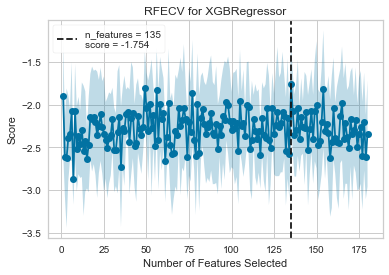

In [8]:
cv = CustomFold(n_splits=10, pad=150, fragmentation=0)
oz = RFECV(model, cv=cv, scoring='neg_mean_absolute_error', step=10)
oz.fit(x, y)
oz.poof()

In [13]:
import pickle

filehandler = open("yellowbrick.pickle","wb")
pickle.dump(oz, filehandler)
filehandler.close()

In [14]:
oz_new = pickle.load(open("yellowbrick.pickle","rb"))

In [51]:
temp = df[df.drop(['ttf'], axis=1).columns[oz_new.support_ == False]]

In [52]:
temp['ttf'] = df.ttf

/home/sergey/.conda/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
temp.to_hdf('../../data/df_reduced.h5', key='table')

In [21]:
oz_av_score = oz.cv_scores_.mean(axis=1)

In [34]:
oz.poof(outpath='../../data/oz_poof.png')

<Figure size 432x288 with 0 Axes>

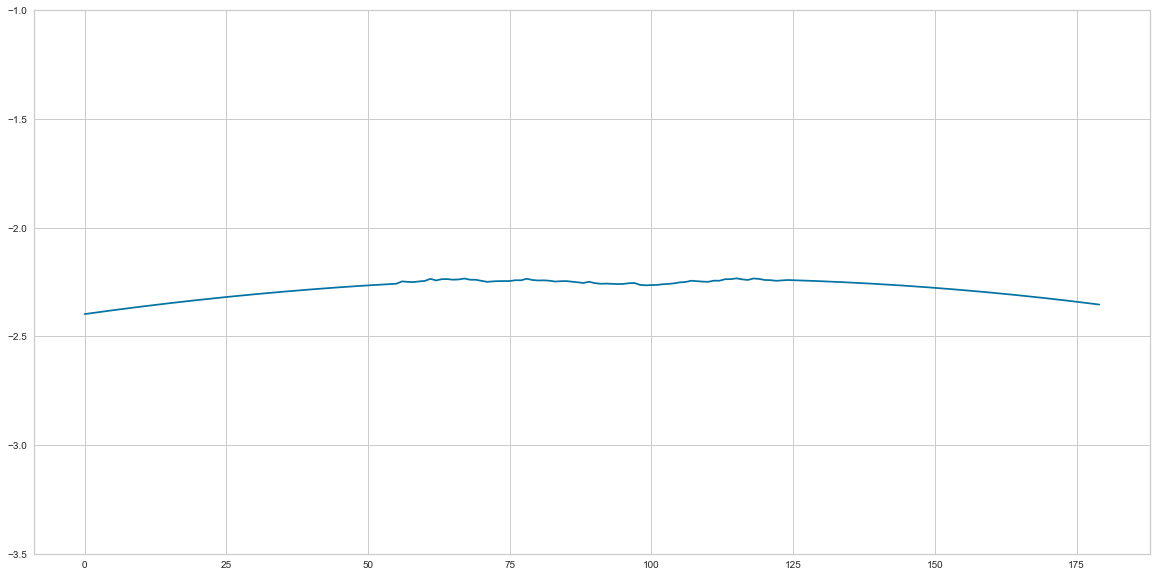

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(savgol_filter(oz_av_score, window_length=111, polyorder=2))
plt.grid(True)
plt.ylim([-3.5, -1])
plt.show()